# DESAFÍO: ANÁLISIS EXPLORATORIO DE DATOS DE LOS USUARIOS LOGUEADOS

En este cuaderno, realizaremos un análisis exploratorio de los datos relacionados con los usuarios logueados en nuestra aplicación. Nuestra principal meta es extraer información relevante para abordar aspectos cruciales con el equipo de negocios. A través de las conclusiones obtenidas, podremos profundizar en el perfil de nuestro público objetivo y evaluar la recepción que está teniendo nuestra aplicación entre el público.

#### Los datos en el DataFrame muestran información detallada sobre los usuarios logueados:

-La columna "fecha" contiene la fecha de logueo de cada usuario.
-La columna "nombre" muestra el nombre de cada usuario.
-"cp" representa el código postal del lugar de residencia del usuario.
-"edad" indica la fecha de nacimiento de cada usuario.
-"n_hijos_menores" muestra el número de hijos menores de cada usuario.
-"sexo" indica el género de cada usuario.
-"email" es la dirección de correo electrónico de cada usuario.

#### Antes de realizar el análisis, es importante abordar ciertas cuestiones de limpieza y consistencia en los datos:

    Asegurarnos de que todas las fechas en la columna "fecha" estén en un formato consistente.

    Calcular la edad real de los usuarios a partir de la fecha de nacimiento y registrarla en la columna "edad".

    Revisar y normalizar los valores en la columna "sexo" para que sean consistentes en mayúsculas o minúsculas.

    Eliminar o tratar duplicados en los nombres de usuarios para garantizar la unicidad.

    Verificar que todas las direcciones de correo electrónico sean válidas y no haya duplicados.

#### Con los datos limpios y listos para el análisis, exploraremos diversas métricas y patrones para obtener insights valiosos:

    Comportamiento de inicio de sesión: Analizaremos la frecuencia y el horario de inicio de sesión para identificar momentos de mayor actividad.

    Distribución geográfica: Investigaremos la ubicación de nuestros usuarios para conocer las regiones con mayor participación y explorar oportunidades de expansión.

    Características demográficas: Examinaremos datos como la edad, el género y la cantidad de hijos menores para entender mejor el perfil de nuestros usuarios.

    Retención y abandono: Estudiaremos la frecuencia de inicio de sesión de los usuarios y las tasas de abandono para detectar posibles áreas de mejora.

    Interacciones y preferencias: Analizaremos las acciones más comunes de los usuarios dentro de la aplicación y sus preferencias de contenido para mejorar la experiencia del usuario.

Con el análisis completo, presentaremos un informe detallado que destacará los hallazgos más relevantes y ofrecerá recomendaciones clave para enriquecer nuestra estrategia comercial. 

In [57]:
# Importamos las distintas librerias necesarias para el análisis

# Tratamiento de datos
import numpy as np
import pandas as pd
import random
from faker import Faker
from datetime import datetime, timedelta

# Rutas
import os

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Tratamiento de las variables categóricas que se pueden ordenar
from sklearn.preprocessing import LabelEncoder

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

In [8]:
VALID_POSTAL_CODES = [
    28001, 28002, 28003, 28004, 28005, 28006, 28007, 28008, 28009, 28010,
    28011, 28012, 28013, 28014, 28015, 28016, 28017, 28018, 28019, 28020,
    28021, 28022, 28023, 28024, 28025, 28026, 28027, 28028, 28029, 28030,
    28031, 28032, 28033, 28034, 28035, 28036, 28037, 28038, 28039, 28040,
    28041, 28042, 28043, 28044, 28045, 28046, 28047, 28048, 28049, 28050,
    28051, 28052, 28053, 28054, 28055, 28070, 28071, 28080, 28082, 28083,
    28085, 28086, 28087
]

def generate_unique_database(num_rows):
    fake = Faker()
    database = set()
    email_set = set()

    start_date = datetime(2023, 1, 1)
    end_date = datetime.now()

    while len(database) < num_rows:
        fecha = fake.date_of_birth(minimum_age=18, maximum_age=100).strftime("%d-%m-%Y")
        nombre = fake.name()
        cp = random.choice(VALID_POSTAL_CODES)
        
        n_hijos_menores = random.randint(0, 5)
        sexo = random.choice(["M", "H"])

        while True:
            email = fake.email()
            if email not in email_set:
                email_set.add(email)
                break
        
        registration_date = fake.date_between(start_date=start_date, end_date=end_date).strftime("%d-%m-%Y")
        
        row = (registration_date, nombre, sexo, fecha, cp, n_hijos_menores, email)
        database.add(row)

    return list(database)

# Example usage:
num_rows = 500

random_database = generate_unique_database(num_rows)

# Convert the list of tuples to a DataFrame
columns = ["fecha_registro", "nombre","sexo","fecha_nacimiento", "cp", "n_hijos_menores", "email"]
df = pd.DataFrame(random_database, columns=columns)

# Display the DataFrame
df

,fecha_registro,nombre,sexo,fecha_nacimiento,cp,n_hijos_menores,email
0,24-07-2023,Jamie Baker,M,14-02-1953,28053,1,grobinson@example.net
1,24-01-2023,Kristin Hutchinson,M,08-09-1998,28027,1,zjackson@example.com
2,18-05-2023,Laura Bryant,M,02-03-1964,28032,1,sara73@example.net
3,25-06-2023,Tammy Harris,H,23-03-1956,28031,3,willisshelia@example.com
4,07-03-2023,Corey Lynch,M,28-11-1977,28040,4,blakeamanda@example.org
...,...,...,...,...,...,...,...
495,04-03-2023,Katherine Peck,H,16-04-1985,28080,5,rriggs@example.org
496,20-05-2023,Patrick Vincent,M,17-08-1930,28051,0,fletcherolivia@example.net
497,08-04-2023,Joann Thomas,M,08-02-1989,28053,3,walkeromar@example.net
498,26-06-2023,Benjamin Conner,M,19-08-1977,28027,2,barreraashley@example.net


In [9]:
# Guardamos el DataFrame a la carpeta de "csv" con el nombre de "usuarios_logueados"
df.to_csv("csv/usuarios_logueados.csv",index=False)

In [36]:
# Leemos el DataFrame
df = pd.read_csv("csv/usuarios_logueados.csv")
df

,fecha_registro,nombre,sexo,fecha_nacimiento,cp,n_hijos_menores,email
0,24-07-2023,Jamie Baker,M,14-02-1953,28053,1,grobinson@example.net
1,24-01-2023,Kristin Hutchinson,M,08-09-1998,28027,1,zjackson@example.com
2,18-05-2023,Laura Bryant,M,02-03-1964,28032,1,sara73@example.net
3,25-06-2023,Tammy Harris,H,23-03-1956,28031,3,willisshelia@example.com
4,07-03-2023,Corey Lynch,M,28-11-1977,28040,4,blakeamanda@example.org
...,...,...,...,...,...,...,...
495,04-03-2023,Katherine Peck,H,16-04-1985,28080,5,rriggs@example.org
496,20-05-2023,Patrick Vincent,M,17-08-1930,28051,0,fletcherolivia@example.net
497,08-04-2023,Joann Thomas,M,08-02-1989,28053,3,walkeromar@example.net
498,26-06-2023,Benjamin Conner,M,19-08-1977,28027,2,barreraashley@example.net


In [37]:
df.dtypes

fecha_registro      object
nombre              object
sexo                object
fecha_nacimiento    object
cp                   int64
n_hijos_menores      int64
email               object
dtype: object

In [38]:
# Observamos que la cantidad de datos es bastante grande con 319755 filas y 18 columnas
# No nos encontramos con valores nulos
# Tenemos valores de tipo objeto y float
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   fecha_registro    500 non-null    object
 1   nombre            500 non-null    object
 2   sexo              500 non-null    object
 3   fecha_nacimiento  500 non-null    object
 4   cp                500 non-null    int64 
 5   n_hijos_menores   500 non-null    int64 
 6   email             500 non-null    object
dtypes: int64(2), object(5)
memory usage: 27.5+ KB


In [39]:
# Nos asecuramos de que no hay valores nulos en ninguna columna
df.isnull().sum()

fecha_registro      0
nombre              0
sexo                0
fecha_nacimiento    0
cp                  0
n_hijos_menores     0
email               0
dtype: int64

### 1. Fecha_registro

In [40]:
# Convertimos la columna 'fecha_registro' a tipo datetime
df['fecha_registro'] = pd.to_datetime(df['fecha_registro'], format='%d-%m-%Y')

### 2. Sexo

In [42]:
# De la columna de "Sexo"
df["sexo"][df["sexo"] == "M"] = 0 # mujer
df["sexo"][df["sexo"] == "H"] = 1 # hombre

# Cambio de tipo objet a tipo int
df["sexo"] = df["sexo"].astype(int)

### 3. Fecha_nacimiento

In [43]:
# Convertimos la columna 'fecha_nacimiento' a tipo datetime
df['fecha_nacimiento'] = pd.to_datetime(df['fecha_nacimiento'], format='%d-%m-%Y')

In [44]:
# Calculamos la edad que tendrán hoy los usuarios
hoy = pd.to_datetime('today')
hoy

Timestamp('2023-07-26 15:39:52.475684')

In [45]:
df['edad'] = hoy.year - df['fecha_nacimiento'].dt.year
df["edad"]

0      70
1      25
2      59
3      67
4      46
       ..
495    38
496    93
497    34
498    46
499    36
Name: edad, Length: 500, dtype: int32

In [47]:
df

,fecha_registro,nombre,sexo,fecha_nacimiento,cp,n_hijos_menores,email,edad
0,2023-07-24,Jamie Baker,0,1953-02-14,28053,1,grobinson@example.net,70
1,2023-01-24,Kristin Hutchinson,0,1998-09-08,28027,1,zjackson@example.com,25
2,2023-05-18,Laura Bryant,0,1964-03-02,28032,1,sara73@example.net,59
3,2023-06-25,Tammy Harris,1,1956-03-23,28031,3,willisshelia@example.com,67
4,2023-03-07,Corey Lynch,0,1977-11-28,28040,4,blakeamanda@example.org,46
...,...,...,...,...,...,...,...,...
495,2023-03-04,Katherine Peck,1,1985-04-16,28080,5,rriggs@example.org,38
496,2023-05-20,Patrick Vincent,0,1930-08-17,28051,0,fletcherolivia@example.net,93
497,2023-04-08,Joann Thomas,0,1989-02-08,28053,3,walkeromar@example.net,34
498,2023-06-26,Benjamin Conner,0,1977-08-19,28027,2,barreraashley@example.net,46


In [48]:
# Eliminación de la columna 'fecha_nacimiento', ya que ahora tenemos la edad en su lugar
df.drop(["fecha_nacimiento", "nombre", "email"], axis=1, inplace=True)

In [49]:
df

,fecha_registro,sexo,cp,n_hijos_menores,edad
0,2023-07-24,0,28053,1,70
1,2023-01-24,0,28027,1,25
2,2023-05-18,0,28032,1,59
3,2023-06-25,1,28031,3,67
4,2023-03-07,0,28040,4,46
...,...,...,...,...,...
495,2023-03-04,1,28080,5,38
496,2023-05-20,0,28051,0,93
497,2023-04-08,0,28053,3,34
498,2023-06-26,0,28027,2,46


In [27]:
df.dtypes

fecha_registro     datetime64[ns]
nombre                     object
sexo                        int32
cp                          int64
n_hijos_menores             int64
email                      object
edad                        int32
dtype: object

In [51]:
df.describe()

,fecha_registro,sexo,cp,n_hijos_menores,edad
count,500,500.000000,500.000000,500.000000,500.000000
mean,2023-04-12 16:16:19.199999744,0.524000,28032.966000,2.530000,59.676000
min,2023-01-01 00:00:00,0.000000,28001.000000,0.000000,18.000000
25%,2023-02-22 00:00:00,0.000000,28014.750000,1.000000,39.000000
50%,2023-04-08 12:00:00,1.000000,28029.000000,3.000000,62.000000
75%,2023-06-07 00:00:00,1.000000,28047.000000,4.000000,80.000000
max,2023-07-25 00:00:00,1.000000,28087.000000,5.000000,101.000000
std,NaN,0.499924,23.083035,1.707317,23.955433


In [53]:
# Para saber como de balanceados están los datos
columns_to_count =["sexo", "cp", "n_hijos_menores", "edad"]
for column in columns_to_count:
    value_counts = df[column].value_counts()
    print(column, value_counts)

sexo sexo
1    262
0    238
Name: count, dtype: int64
cp cp
28027    14
28080    13
28003    12
28034    12
28008    12
         ..
28035     4
28054     4
28043     3
28037     3
28005     3
Name: count, Length: 63, dtype: int64
n_hijos_menores n_hijos_menores
4    97
0    83
1    82
3    82
5    79
2    77
Name: count, dtype: int64
edad edad
90     14
63     14
19     14
68     12
66     12
       ..
37      2
64      2
23      2
99      2
101     2
Name: count, Length: 84, dtype: int64


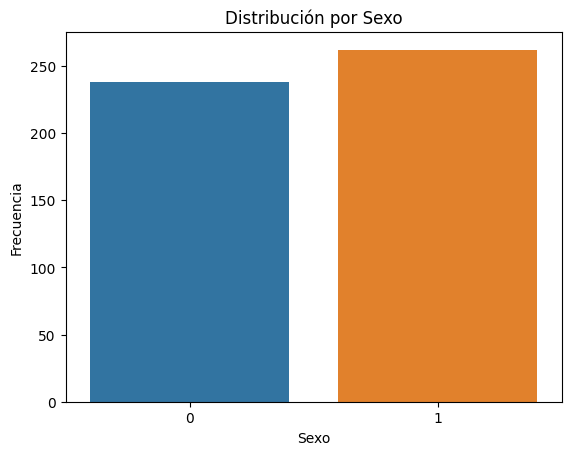

In [54]:
# Representar la variable de "sexo"
sns.countplot(x="sexo", data=df)
plt.title('Distribución por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')
plt.show()

In [59]:

current_dir = os.getcwd()
current_dir = os.path.join(current_dir, )

'c:\\Users\\alexm\\OneDrive\\Escritorio\\DESAFIO'

Gráfico guardado en: c:\Users\alexm\OneDrive\Escritorio\DESAFIO\docs\imagenes\pie_plot.png


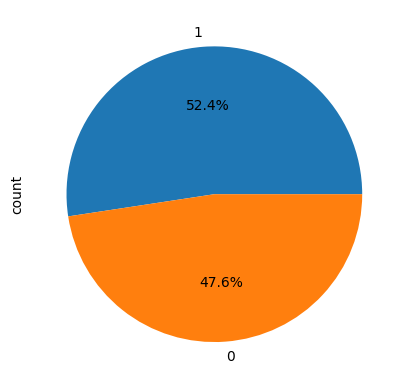

In [62]:
current_dir = os.getcwd() # Ruta del directorio actual
output_file = os.path.join(current_dir, 'docs', 'imagenes', 'pie_plot.png') # Ruta donde se guardará la imagen creada

# Mostramos el balanceo de datos 
fig2 = df['sexo'].value_counts().plot.pie(autopct="%.1f%%")

fig2.figure.savefig(output_file) # Guardamos el gráfico

print(f"Gráfico guardado en: {output_file}")

<details>
<summary>Explicación detallada de la variable "sexo"</summary>
<p>


</p>
</details>

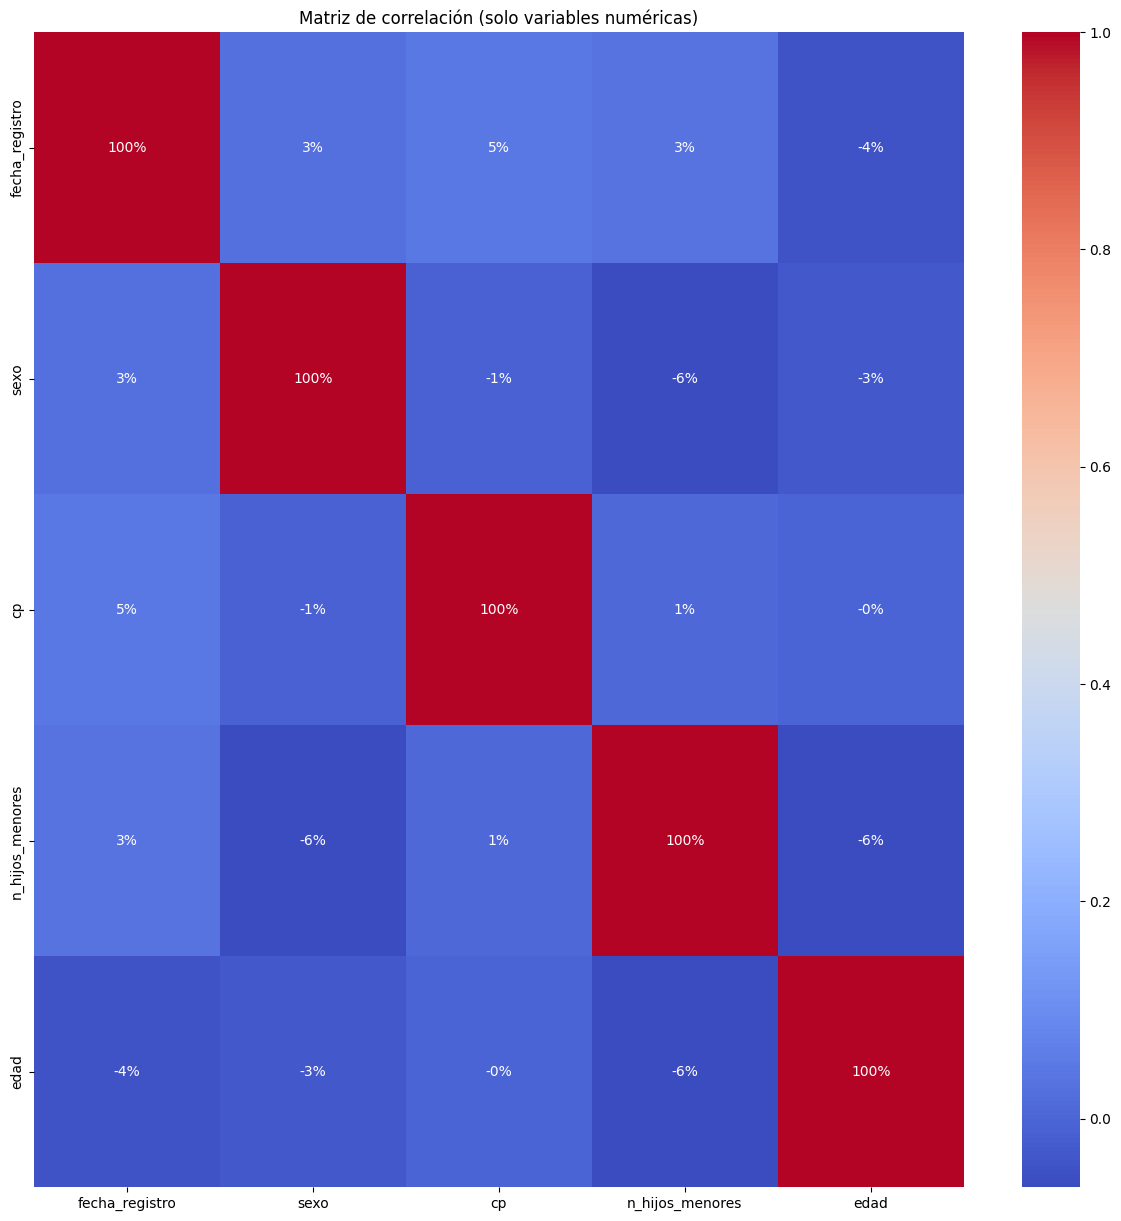

In [50]:
# Calculamos la matriz de correlación para las columnas numéricas
correlation_matrix = df.corr()

# Creamos mapa de calor de correlación
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".0%" )
plt.title('Matriz de correlación (solo variables numéricas)')
plt.show()
